##### Importing important libraries 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mn
import seaborn as sns
from pylab import rcParams
import numpy as np

#### Data Collection and Data Cleaning 

In [63]:
df = pd.read_csv("archive/cardio_train.csv",sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [64]:
df.shape

(70000, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<AxesSubplot:>

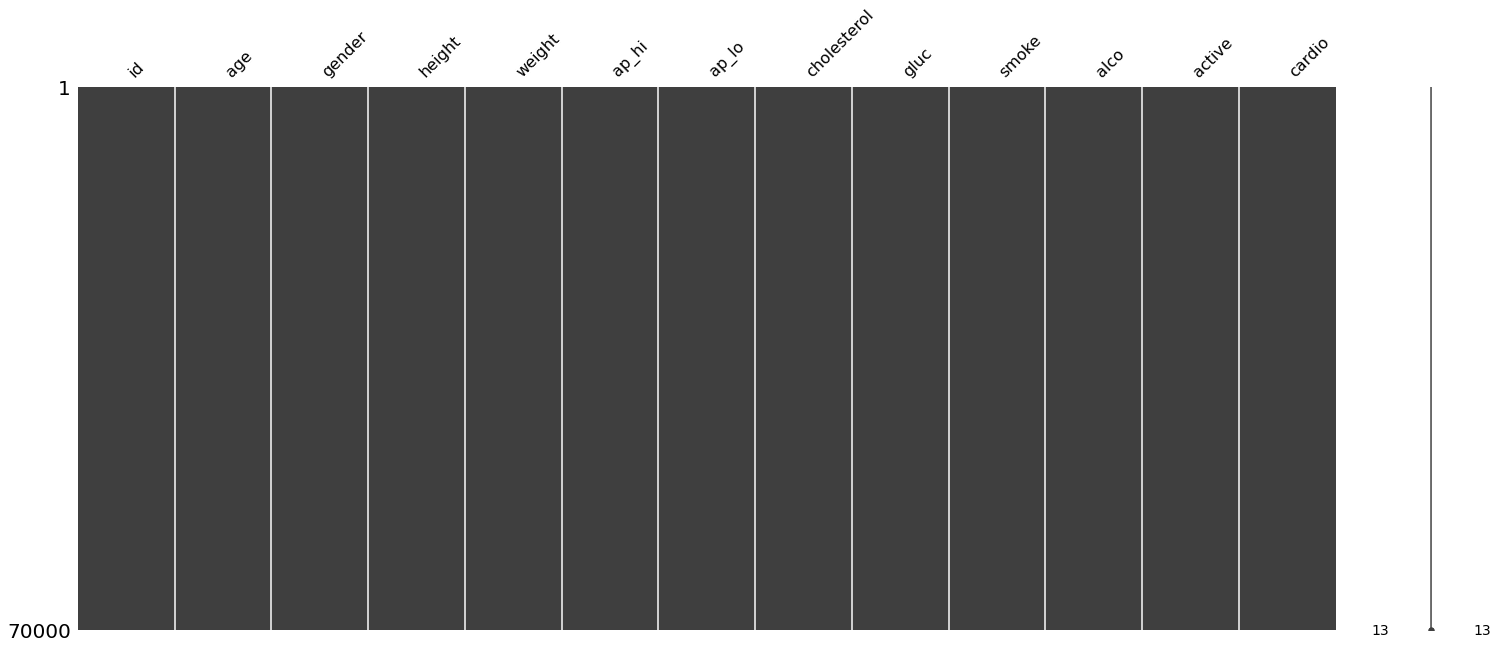

In [15]:
mn.matrix(df)

In [11]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Data Understanding (EDA and Visualizations)

<AxesSubplot:xlabel='age in year', ylabel='count'>

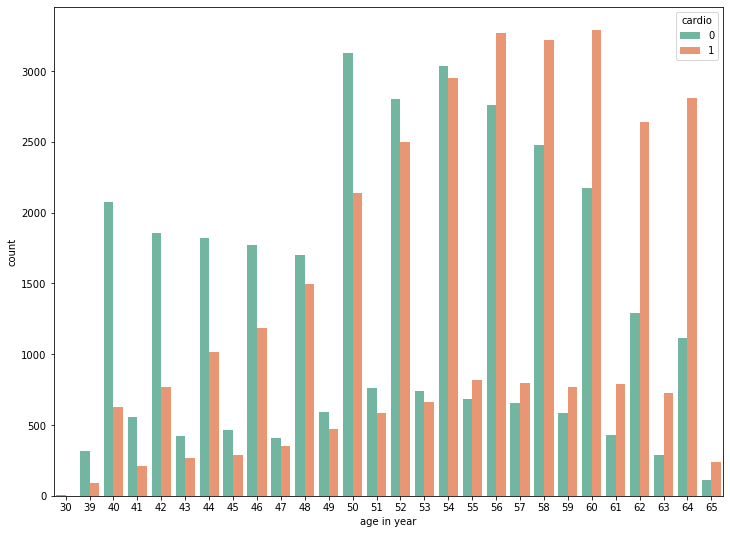

In [25]:
rcParams['figure.figsize'] = 12 , 9
df['age in year'] = ((df['age']/365).round().astype('int'))
sns.countplot(x='age in year', hue='cardio', data=df , palette = "Set2")

Here we can  see that people over age 55 have high chance of having cardio vascular disease(CVD).

<AxesSubplot:xlabel='variable', ylabel='count'>

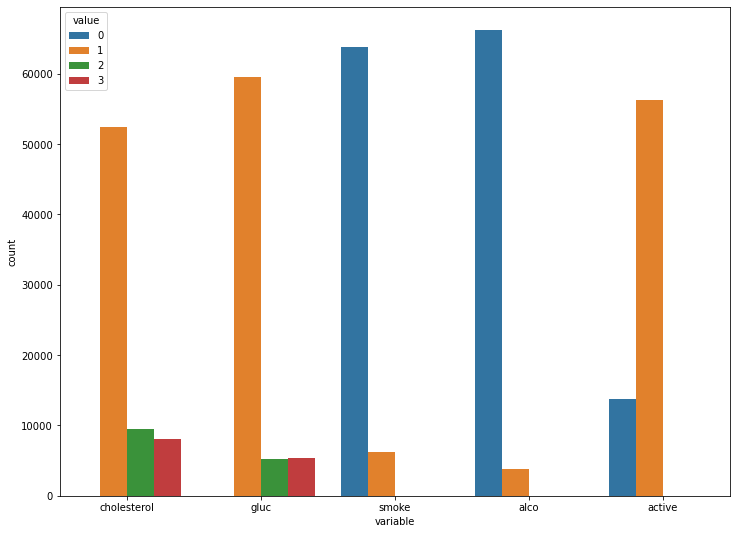

In [32]:
df_categorical = df.loc[:,['cholesterol','gluc','smoke','alco','active']]
sns.countplot(x = 'variable' ,hue ='value', data= pd.melt(df_categorical))

#### Bivariate analysis.
It may be useful to split categorical variables by target class:

In [33]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'age in year'],
      dtype='object')

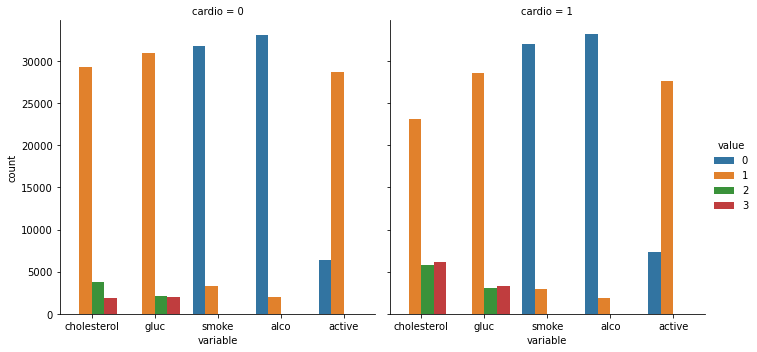

In [35]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active'])
sns.catplot(x='variable', hue='value', col='cardio',
            data=df_long, kind='count');

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [36]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

From this data we can infer that 1 is Women and 2 is Men.

In [37]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Let's see who consume more alcohol men or womens

In [38]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

More often men drink more alcohol than women

In [39]:
df['cardio'].value_counts(normalize = True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [41]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range. Because they are  just outliers

In [42]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)


In some cases we found that  diastolic pressure is higher than systolic, which is also incorrect. Let see how many records are inaccurate in terms of blood pressure?

In [47]:
print(f"Diastilic pressure is higher than systolic  in {df[df['ap_lo']> df['ap_hi']].shape[0]} cases")

Diastilic pressure is higher than systolic  in 1082 cases


Removing more outlier from bloodpressure which are below positive values.

In [51]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic in 0 cases


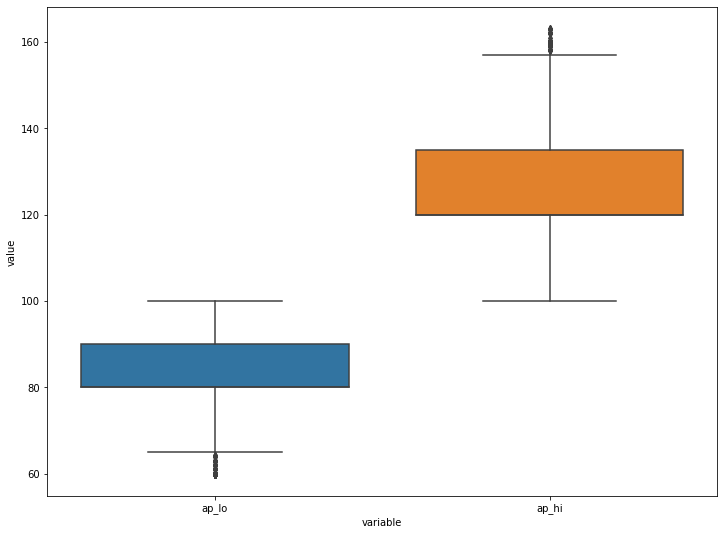

In [53]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print(f"Diastilic pressure is higher than systolic in {df[df['ap_lo']> df['ap_hi']].shape[0]} cases")

###### Multivariate analysis
It might be useful to consider correation matrix:

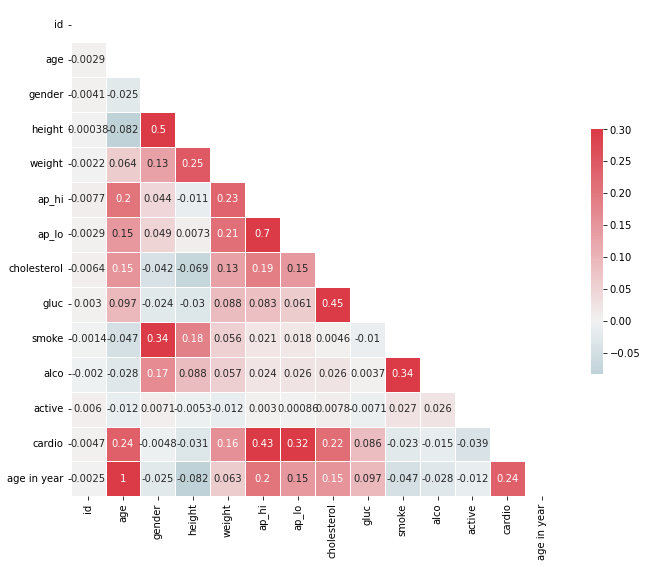

In [60]:
import warnings
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

Let's create violinplot to show height distribution across gender. Looking at the mean values of height and weight for each value of the gender feature might not be enough to determin whether 1 is male or female designation.

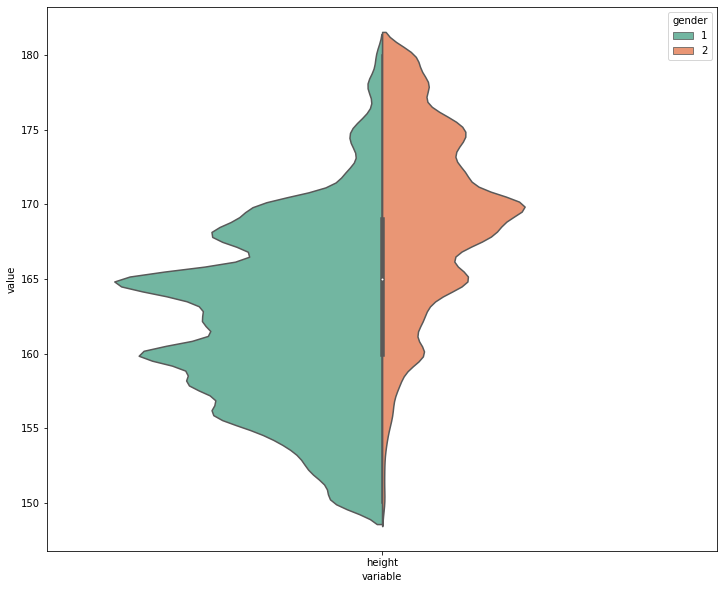

In [59]:

warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");


Let's create a new feature - Body Mass Index (BMI) and compare average BMI for healthy people to average BMI of ill people. Normal BMI values are said to be from 18.5 to 25.

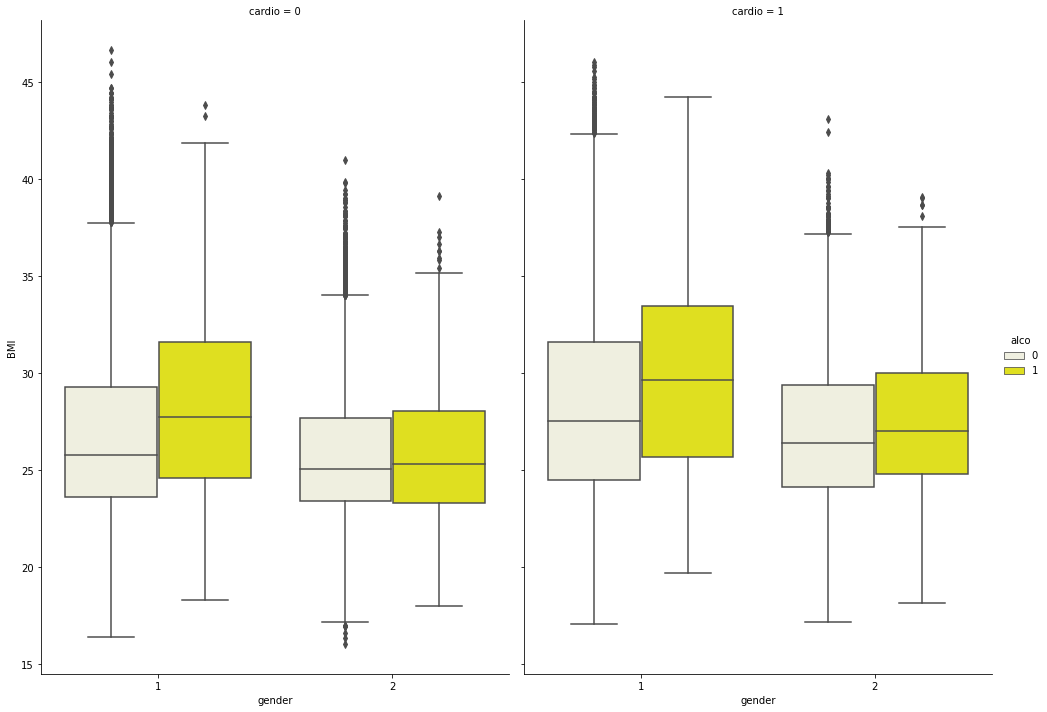

In [61]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

Drinking women have higher risks for Cardio Vascular Disease than drinking men based on thier BMI.